# Exploratory Data Aanalysis for Pima Indians Diabetes

## Introduction
The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.


## Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


### Acknowledgements & Source
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

The current source is in Kaggle as public datasets: https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('diabetes.csv')
print(df.shape)
print(df.columns)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
# Summarizing data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data content:
**Columns:** Total 9 columns, 8 properties and 1 target label indicates if the person has been diagnosed with diabetes (1) or not (0)

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

**Rows:** Records from 768 women 

some values are not in the range where they are supposed to be, should be treated as missing value.
What kind of method is better to use to fill this type of missing value? How further clasification will be like?
Is there any sub-groups significantly more likely to have diabetes? 

### Inspiration:

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


## Additional Backgroud Information

### What is diabetes ?
https://en.wikipedia.org/wiki/Diabetes_mellitus

Diabetes mellitus (DM), commonly referred to as **diabetes**, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period.[10] Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger.[2] If left untreated, diabetes can cause many complications.[2] Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death.[3] Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.[2]

Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body not responding properly to the insulin produced.[11] There are three main types of diabetes mellitus:[2]

* Type 1 DM results from the pancreas' failure to produce enough insulin due to loss of beta cells.[2] This form was previously referred to as "insulin-dependent diabetes mellitus" (IDDM) or "juvenile diabetes".[2] The cause is unknown.[2]
* Type 2 DM begins with insulin resistance, a condition in which cells fail to respond to insulin properly.[2] As the disease progresses, a lack of insulin may also develop.[12] This form was previously referred to as "non insulin-dependent diabetes mellitus" (NIDDM) or "adult-onset diabetes".[2] The most common cause is a combination of excessive body weight and insufficient exercise.[2]
* Gestational diabetes is the third main form, and occurs when pregnant women without a previous history of diabetes develop high blood sugar levels.[2]



## Exploratory Visualization

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


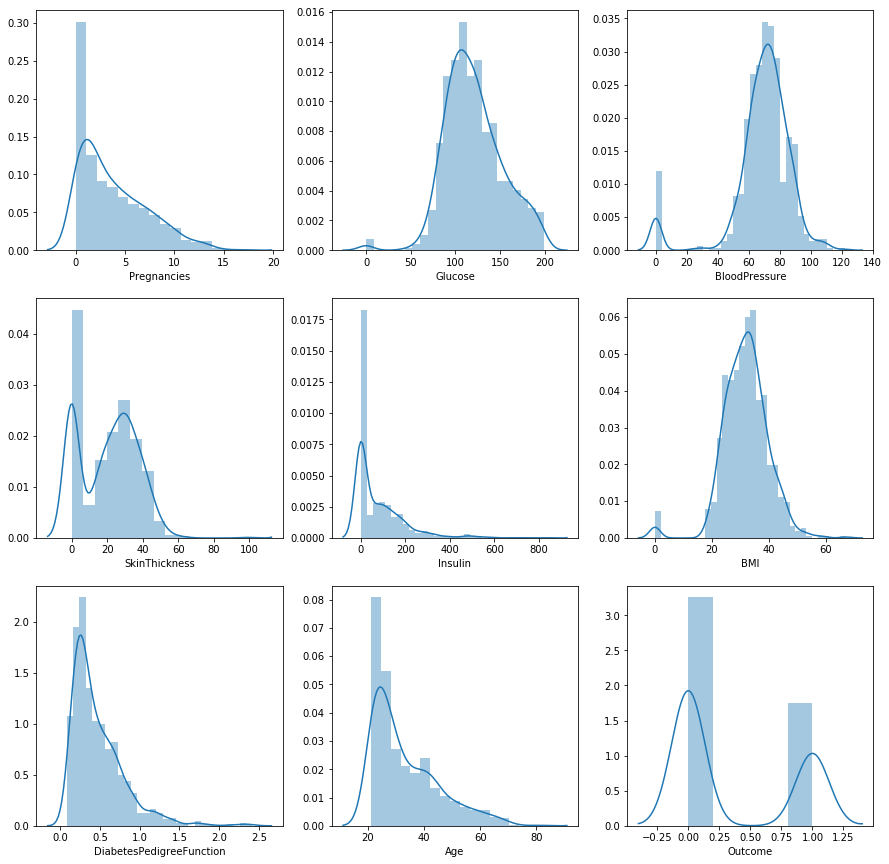

In [3]:
# Histogram
plt.figure(figsize=(15,15))
for i, col  in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.distplot(df[col])
#     sns.distplot(df[col], kde=False, norm_hist = False)   


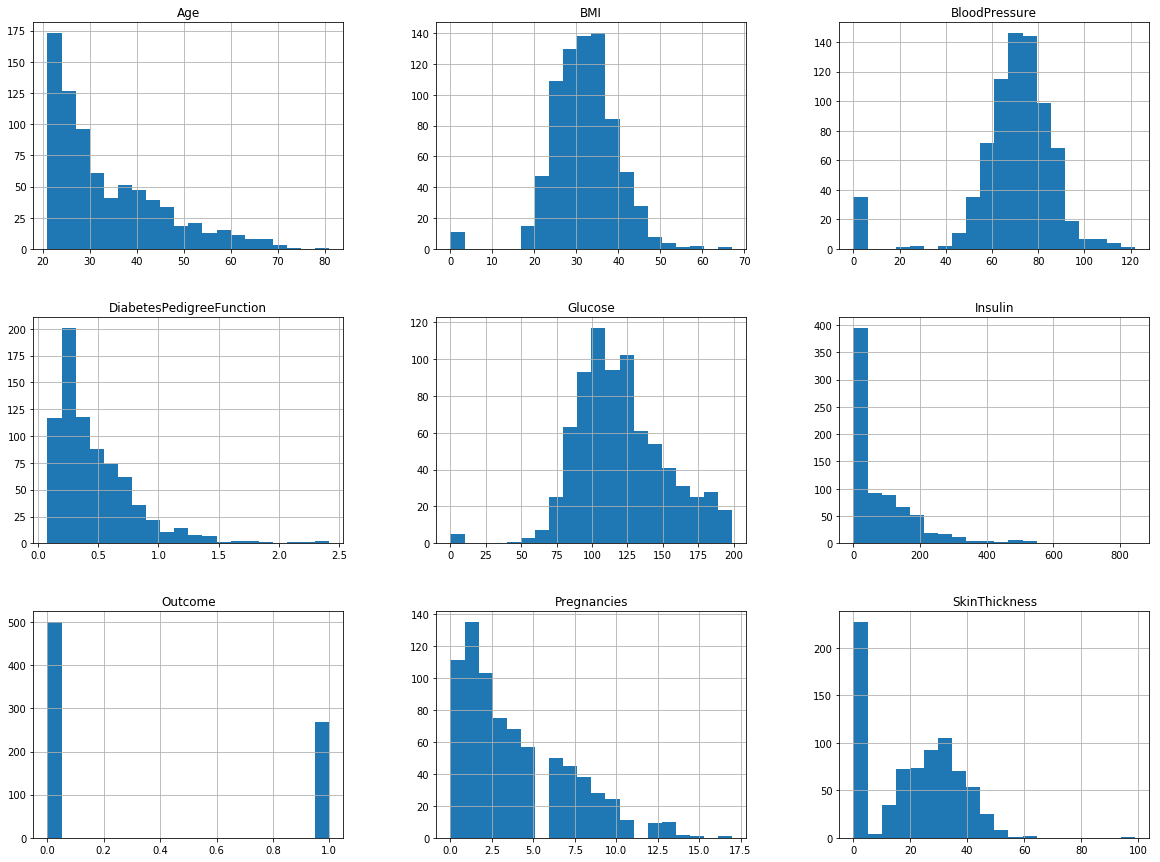

In [4]:
# histogram using build in fuction in Pandas
df.hist(bins=20, figsize=(20, 15))
plt.show()

## Missing data

There is no missing data in the dataset

In [5]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] - missing_df['missing_count']) / df.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)


,column_name,missing_count,filling_factor
0,Pregnancies,0,100.0
1,Glucose,0,100.0
2,BloodPressure,0,100.0
3,SkinThickness,0,100.0
4,Insulin,0,100.0
5,BMI,0,100.0
6,DiabetesPedigreeFunction,0,100.0
7,Age,0,100.0
8,Outcome,0,100.0


## Outliers

Some values are not in the range where they are supposed to be, should be treated as missing value.
What kind of method is better to use to fill this type of missing value? 

In [6]:
df[['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness']] = df[['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness']].replace(0,np.NaN)

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] - missing_df['missing_count']) / df.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,Insulin,374,51.302083
1,SkinThickness,227,70.442708
2,BloodPressure,35,95.442708
3,BMI,11,98.567708
4,Glucose,5,99.348958
5,Pregnancies,0,100.000000
6,DiabetesPedigreeFunction,0,100.000000
7,Age,0,100.000000
8,Outcome,0,100.000000


In [7]:
# replace with median
df_replace = df.copy()
for i in ['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness']:
    df_replace[i][df_replace.isna()[i]] = df_replace.median()[i]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


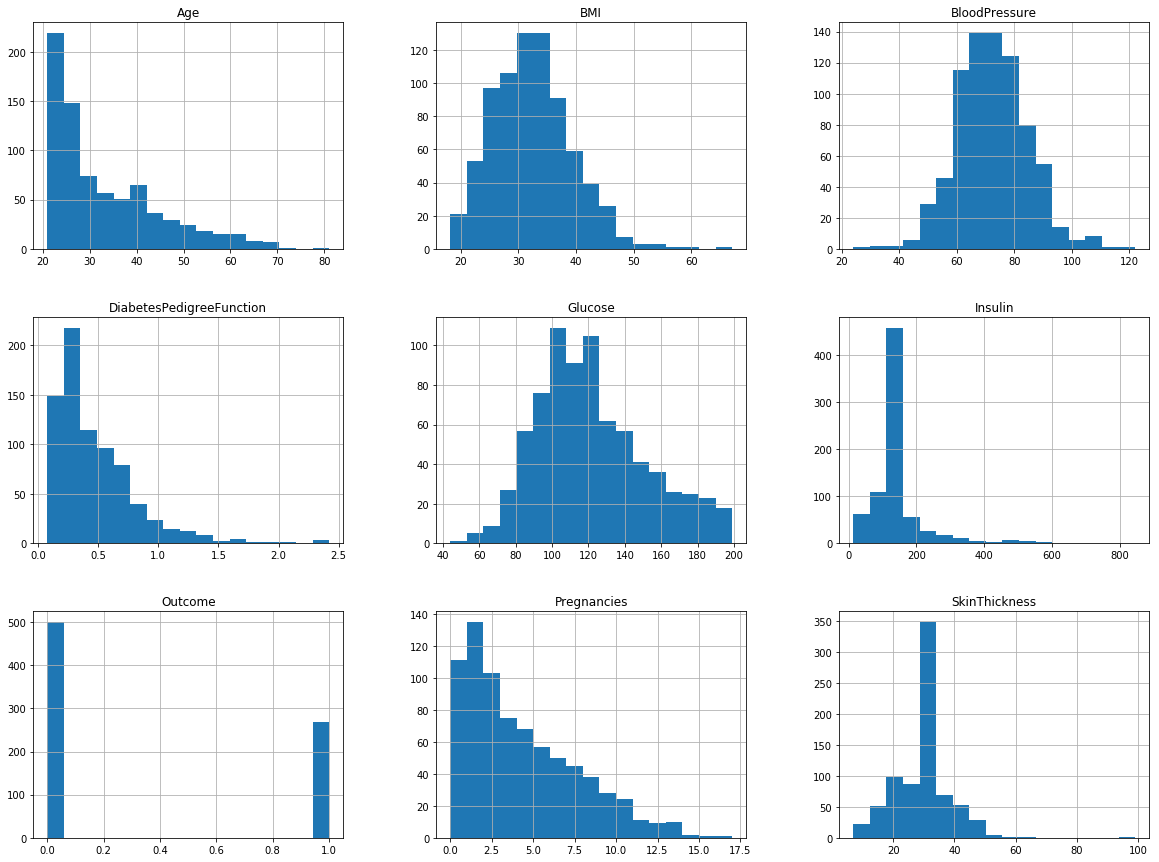

In [8]:
# histogram after
df_replace.hist(bins=17, figsize=(20, 15))
plt.show()

## Correlation

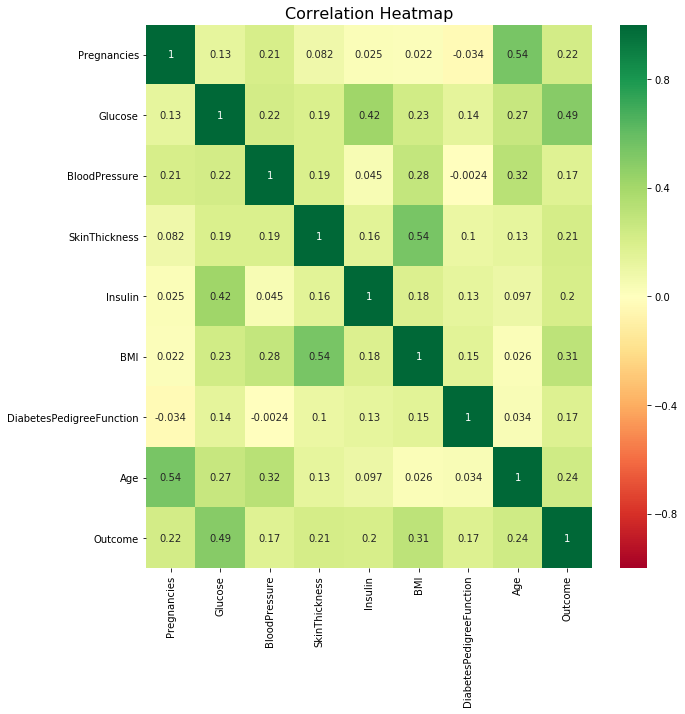

In [9]:
plt.figure(figsize=(10,10))
corr = df_replace.corr()
corr.index = df_replace.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## Pairplot

<Figure size 720x720 with 0 Axes>

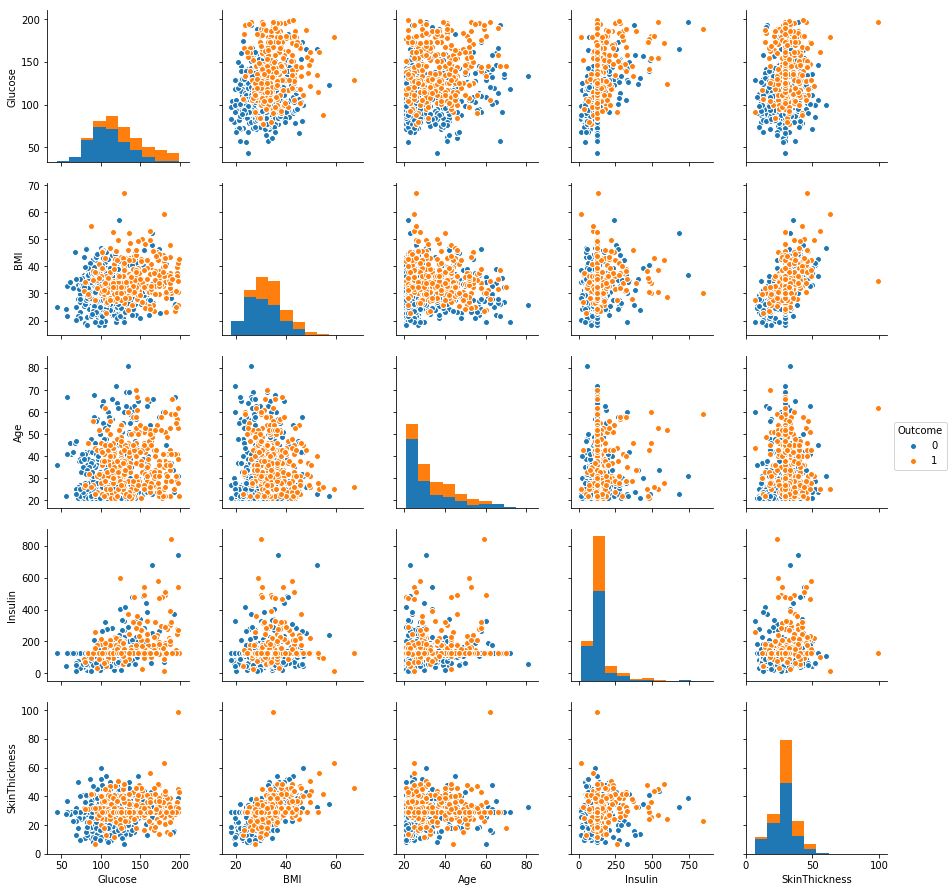

In [10]:
plt.figure(figsize=(10,10))
sns.pairplot(df_replace, vars= ['Glucose','BMI','Age', 'Insulin','SkinThickness'], hue='Outcome');

## Build machine learning models to predict diabete outcome

We want to build robust machine learning models to accurately predict whether or not the patients in the dataset have diabetes or not.


### Create Training and Testing data:

In [11]:
from sklearn.model_selection import train_test_split
X = df_replace[df_replace.columns[:-1]]
y = df_replace[df_replace.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (576, 8)
y_train shape: (576,)


In [12]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (192, 8)
y_test shape: (192,)


### Build model with *Decision Trees *

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dtree=DecisionTreeClassifier()  

# Train the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predict outcome and evaluate model

In [14]:
y_pred = dtree.predict(X_test) 
print('prediction:\n {}'.format(y_pred))
print('actual:\n {}'.format(np.array(y_test)))

prediction:
 [1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 1 0 0]
actual:
 [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [15]:
print("Test set score: {:.2f}".format(dtree.score(X_test, y_test)))

Test set score: 0.75


In [16]:
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))

Test set score: 0.75


### improve performance with ensemble model

In [17]:
from sklearn.ensemble import RandomForestClassifier 
RF= RandomForestClassifier(n_estimators=100,random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test) 
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))

Test set score: 0.78


In [18]:
RF.feature_importances_

array([0.08067579, 0.23594114, 0.08485419, 0.07502546, 0.0853434 ,
       0.16045856, 0.12957401, 0.14812745])

In [19]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

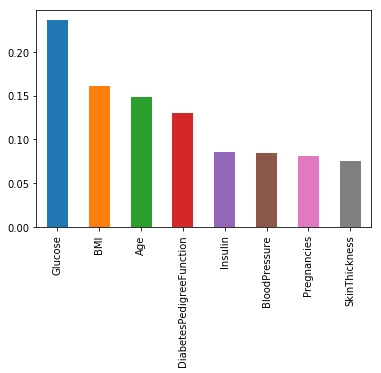

In [20]:
feat_importances = pd.Series(RF.feature_importances_, index=df.columns[:8])
feat_importances.nlargest(10).plot(kind='bar')

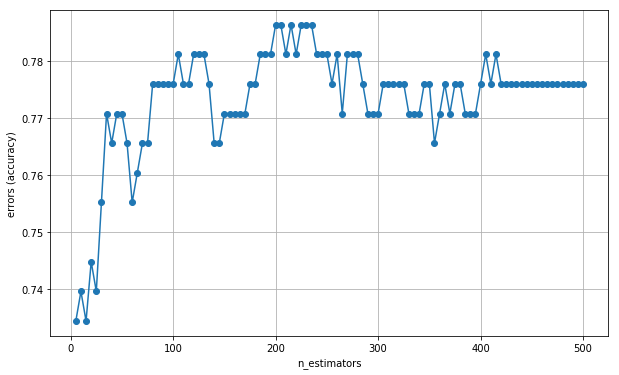

In [21]:
iters = list(range(5,501,5))
errors = []
for i in iters:
    model = RandomForestClassifier(n_estimators=i,random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    errors.append(np.mean(y_pred==y_test))
    
plt.figure(figsize=(10,6))
plt.plot(iters, errors, 'o-')
plt.xlabel('n_estimators')
plt.ylabel('errors (accuracy)')
plt.grid()